In [1]:
import pandas as pd
import numpy as np
# import pydot

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC

from sklearn.metrics import f1_score,roc_curve,auc,precision_score,recall_score

from sklearn.metrics import confusion_matrix

import seaborn as sns
from scipy import stats
import scipy.stats
import statsmodels.api as smd
from statsmodels.stats.proportion import proportions_ztest

# 가설검정, 분산분석하는 패키지
from statsmodels.formula.api import ols # 분산분석하기? 모델링?
from statsmodels.stats.anova import anova_lm # 아노바 데이터프레임 형태 출력
from scipy.stats import shapiro
%matplotlib inline
from sklearn.preprocessing import scale,minmax_scale,robust_scale
from scipy.stats import probplot
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit

# # font_path = 'C:/Windows/Fonts/gulim.ttc'
# font_path = 'C:/Windows/Fonts/gulim.ttc'
# font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
# matplotlib.rc('font', family = font_name)

from matplotlib import font_manager,rc

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.api import qqplot, add_constant

# from sklearn.tree import export_graphviz
# import graphviz

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
# import pydot

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC

from sklearn.metrics import f1_score,roc_curve,auc,precision_score,recall_score

from sklearn.metrics import confusion_matrix

import seaborn as sns
from scipy import stats
import scipy.stats
import statsmodels.api as smd
from statsmodels.stats.proportion import proportions_ztest

# 가설검정, 분산분석하는 패키지
from statsmodels.formula.api import ols # 분산분석하기? 모델링?
from statsmodels.stats.anova import anova_lm # 아노바 데이터프레임 형태 출력
from scipy.stats import shapiro
%matplotlib inline
from sklearn.preprocessing import scale,minmax_scale,robust_scale
from scipy.stats import probplot
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit

# # font_path = 'C:/Windows/Fonts/gulim.ttc'
# font_path = '/usr/share/fonts/opentype/noto/NotoSerifCJK-ExtraLight.ttc'
# font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
# matplotlib.rc('font', family = font_name)

from matplotlib import font_manager,rc

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.api import qqplot, add_constant

# from sklearn.tree import export_graphviz
# import graphviz

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
df_raw = pd.read_csv('review_1.csv',encoding='euckr')

In [3]:
df_raw.isna().sum()

Unnamed: 0           0
Unnamed: 0.1         0
customer_id          0
review_cat           0
judge                0
review_date          0
gender               0
age                  0
height               0
weight               0
bust                 0
waist                0
bp_min               0
bp_max               0
pulse_count          0
bt_chol              0
bt_crea              0
bt_gluc              0
bt_hb                0
bt_hbsa              0
bt_hct               0
bt_mch               0
bt_mchc              0
bt_mvc               0
bt_plat              0
bt_rbc               0
bt_wbc               0
bt_rgpt              0
bt_sgot              0
bt_sgpt              0
bt_trig              0
judge_score          0
bp_judge             0
pulse_count_judge    0
bt_chol_judge        0
bt_crea_judge        0
bt_gluc_judge        0
bt_hb_judge          0
bt_hbsa_judge        0
bt_hct_judge         0
bt_mch_judge         0
bt_mchc_judge        0
bt_mvc_judge         0
bt_plat_jud

In [4]:
g_raw = df_raw[df_raw['review_cat'] != '혈액검사'].drop('Unnamed: 0',axis=1)
g_raw.head()

,Unnamed: 0.1,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,...,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi,whtr,rfm,risk
2,38,C112411,일반검진,재검,2015-09-20,1,69,165,70,92.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,25.7,53.3,26.5,1.0
3,138,C112570,일반검진,재검,2015-05-27,1,67,165,75,95.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,27.5,53.9,26.9,1.0
4,236,C112727,일반검진,승인,2015-06-24,1,65,160,50,89.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,19.5,41.2,15.5,1.0
5,239,C112730,일반검진,승인,2015-09-01,1,65,164,64,97.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,23.8,48.8,23.0,1.0
6,249,C112742,일반검진,승인,2015-09-02,1,65,169,62,89.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,21.7,42.6,17.1,1.0


In [5]:
g_raw.isna().sum()

Unnamed: 0.1         0
customer_id          0
review_cat           0
judge                0
review_date          0
gender               0
age                  0
height               0
weight               0
bust                 0
waist                0
bp_min               0
bp_max               0
pulse_count          0
bt_chol              0
bt_crea              0
bt_gluc              0
bt_hb                0
bt_hbsa              0
bt_hct               0
bt_mch               0
bt_mchc              0
bt_mvc               0
bt_plat              0
bt_rbc               0
bt_wbc               0
bt_rgpt              0
bt_sgot              0
bt_sgpt              0
bt_trig              0
judge_score          0
bp_judge             0
pulse_count_judge    0
bt_chol_judge        0
bt_crea_judge        0
bt_gluc_judge        0
bt_hb_judge          0
bt_hbsa_judge        0
bt_hct_judge         0
bt_mch_judge         0
bt_mchc_judge        0
bt_mvc_judge         0
bt_plat_judge        0
bt_rbc_judg

In [6]:
g_raw

,Unnamed: 0.1,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,...,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi,whtr,rfm,risk
2,38,C112411,일반검진,재검,2015-09-20,1,69,165,70,92.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,25.7,53.3,26.5,1.0
3,138,C112570,일반검진,재검,2015-05-27,1,67,165,75,95.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,27.5,53.9,26.9,1.0
4,236,C112727,일반검진,승인,2015-06-24,1,65,160,50,89.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,19.5,41.2,15.5,1.0
5,239,C112730,일반검진,승인,2015-09-01,1,65,164,64,97.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,23.8,48.8,23.0,1.0
6,249,C112742,일반검진,승인,2015-09-02,1,65,169,62,89.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,21.7,42.6,17.1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4492,14846,C134065,일반검진,재검,2015-06-15,2,53,158,54,88.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,21.6,49.4,35.5,1.0
4499,14866,C134107,일반검진,재검,2015-07-12,2,55,158,63,98.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,25.2,50.6,36.5,1.0
4515,14911,C134186,일반검진,승인,2015-05-12,2,38,161,65,94.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,25.1,49.7,35.8,1.0
4518,14931,C134250,일반검진,승인,2015-09-16,2,52,164,60,90.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,22.3,40.2,26.3,1.0


In [7]:
g_test_1 = g_raw.iloc[:,:15]
g_test_2 = g_raw[['bp_judge','pulse_count_judge','judge_score','risk','customer_id','bmi','whtr']]
g_test = pd.merge(g_test_1,g_test_2,on='customer_id',how='left')
g_test

,Unnamed: 0.1,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,...,bp_min,bp_max,pulse_count,bt_chol,bp_judge,pulse_count_judge,judge_score,risk,bmi,whtr
0,38,C112411,일반검진,재검,2015-09-20,1,69,165,70,92.0,...,75,120,68.0,-1.0,0,0,0,1.0,25.7,53.3
1,138,C112570,일반검진,재검,2015-05-27,1,67,165,75,95.0,...,90,140,70.0,-1.0,1,0,1,1.0,27.5,53.9
2,236,C112727,일반검진,승인,2015-06-24,1,65,160,50,89.0,...,80,130,64.0,-1.0,1,0,0,1.0,19.5,41.2
3,239,C112730,일반검진,승인,2015-09-01,1,65,164,64,97.0,...,80,125,68.0,-1.0,1,0,0,1.0,23.8,48.8
4,249,C112742,일반검진,승인,2015-09-02,1,65,169,62,89.0,...,80,120,70.0,-1.0,0,0,0,1.0,21.7,42.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,14846,C134065,일반검진,재검,2015-06-15,2,53,158,54,88.0,...,80,110,80.0,-1.0,0,0,0,1.0,21.6,49.4
985,14866,C134107,일반검진,재검,2015-07-12,2,55,158,63,98.0,...,80,135,70.0,-1.0,1,0,1,1.0,25.2,50.6
986,14911,C134186,일반검진,승인,2015-05-12,2,38,161,65,94.0,...,70,110,72.0,-1.0,0,0,0,1.0,25.1,49.7
987,14931,C134250,일반검진,승인,2015-09-16,2,52,164,60,90.0,...,80,120,70.0,-1.0,0,0,0,1.0,22.3,40.2


In [8]:
g_test.columns

Index(['Unnamed: 0.1', 'customer_id', 'review_cat', 'judge', 'review_date',
       'gender', 'age', 'height', 'weight', 'bust', 'waist', 'bp_min',
       'bp_max', 'pulse_count', 'bt_chol', 'bp_judge', 'pulse_count_judge',
       'judge_score', 'risk', 'bmi', 'whtr'],
      dtype='object')

## 탐색적 분석

In [9]:
def myhist(data,var):
    plt.hist(data[data['risk']==0][var],label = '수익', alpha = 0.5)
    plt.hist(data[data['risk']==1][var],label = '위험', alpha = 0.5)
    plt.legend()
    
def mycrosstab(data,var) : 
    print(pd.crosstab(index = data['risk'], columns = data[var]))
    print()
    print(pd.crosstab(index = data['risk'], columns = data[var],normalize = 'columns').round(3))

In [10]:
def my_t(data,var):
    k = stats.levene(data[data['risk']==0][var],data[data['risk']==1][var])
    t_result = stats.ttest_ind(data[data['risk']==0][[var]],
                               data[data['risk']==1][[var]],equal_var=True) # 2 sample 비교 명령어

    t,p = t_result
    print(k,p)

### 검정 탐색

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49849 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: Runtim

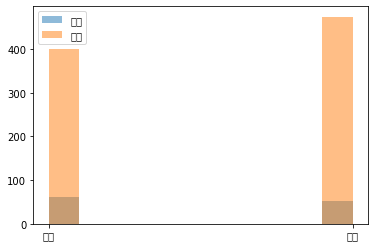

In [11]:
myhist(g_test,'judge')

In [12]:
mycrosstab(g_test,'judge')

judge   승인   재검
risk           
0.0     62   53
1.0    400  474

judge     승인     재검
risk               
0.0    0.134  0.101
1.0    0.866  0.899


In [13]:
a = 62 ; b =53 ; c = 401 ; d = 474

count = np.array([a,b])
num = np.array([a+c,b+d])

stat, p_value = proportions_ztest(count,num)
print('p-value는 {:.3f}'.format(p_value.round(3))) # 유의 X, 층별 x

p-value는 0.102


/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

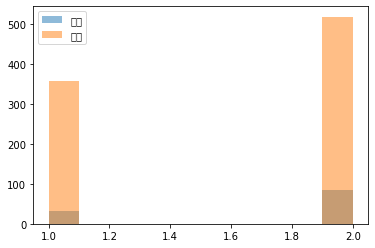

In [14]:
myhist(g_test,'gender')

In [15]:
mycrosstab(g_test,'gender')

gender    1    2
risk            
0.0      31   84
1.0     356  518

gender     1     2
risk              
0.0     0.08  0.14
1.0     0.92  0.86


In [16]:
a = 31 ; b = 84 ; c = 356 ; d = 519

count = np.array([a,b])
num = np.array([a+c,b+d])

stat, p_value = proportions_ztest(count,num)
print('p-value는 {:.3f}'.format(p_value.round(3))) # 유의

p-value는 0.005


/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

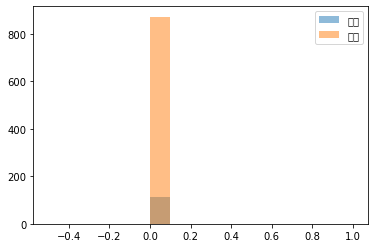

In [17]:
myhist(g_test,'pulse_count_judge') # pulse count 1 고객 존재 X -> 판단 불가, 제외

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

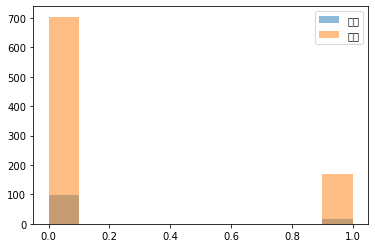

In [18]:
myhist(g_test,'bp_judge')

In [19]:
mycrosstab(g_test,'bp_judge')

bp_judge    0    1
risk              
0.0        97   18
1.0       704  170

bp_judge      0      1
risk                  
0.0       0.121  0.096
1.0       0.879  0.904


In [20]:
a = 97 ; b = 18 ; c = 705 ; d = 170

count = np.array([a,b])
num = np.array([a+c,b+d])

stat, p_value = proportions_ztest(count,num)
print('p-value는 {:.3f}'.format(p_value.round(3)))

p-value는 0.332


/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

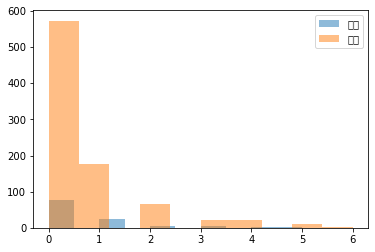

In [21]:
myhist(g_test,'judge_score')

In [22]:
mycrosstab(g_test,'judge_score')

judge_score    0    1   2   3   4   5  6
risk                                    
0.0           77   23   4   6   2   3  0
1.0          573  177  66  22  22  11  3

judge_score      0      1      2      3      4      5    6
risk                                                      
0.0          0.118  0.115  0.057  0.214  0.083  0.214  0.0
1.0          0.882  0.885  0.943  0.786  0.917  0.786  1.0


In [23]:
df = pd.DataFrame({'A':[77,23,4,6,2,3,0],'B':[574,177,66,22,22,11,3]})
chi, p, dof, expected = stats.chi2_contingency(df.T) #테이블 형태로 넣는다는 의미
print('검정 통계량은 {0} p-value는 {1})'.format(chi.round(3), p.round(6)))

검정 통계량은 6.991 p-value는 0.321682)


### judge_score 파생

In [24]:
g_test['new_judge'] = np.where(g_test['judge_score']<5,0,1)
g_test.head()

,Unnamed: 0.1,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,...,bp_max,pulse_count,bt_chol,bp_judge,pulse_count_judge,judge_score,risk,bmi,whtr,new_judge
0,38,C112411,일반검진,재검,2015-09-20,1,69,165,70,92.0,...,120,68.0,-1.0,0,0,0,1.0,25.7,53.3,0
1,138,C112570,일반검진,재검,2015-05-27,1,67,165,75,95.0,...,140,70.0,-1.0,1,0,1,1.0,27.5,53.9,0
2,236,C112727,일반검진,승인,2015-06-24,1,65,160,50,89.0,...,130,64.0,-1.0,1,0,0,1.0,19.5,41.2,0
3,239,C112730,일반검진,승인,2015-09-01,1,65,164,64,97.0,...,125,68.0,-1.0,1,0,0,1.0,23.8,48.8,0
4,249,C112742,일반검진,승인,2015-09-02,1,65,169,62,89.0,...,120,70.0,-1.0,0,0,0,1.0,21.7,42.6,0


/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

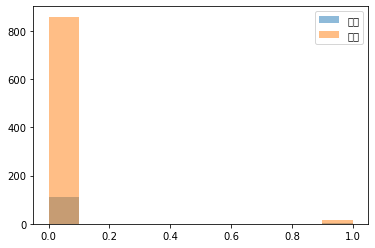

In [25]:
myhist(g_test,'new_judge')

In [26]:
mycrosstab(g_test,'new_judge')

new_judge    0   1
risk              
0.0        112   3
1.0        860  14

new_judge      0      1
risk                   
0.0        0.115  0.176
1.0        0.885  0.824


In [27]:
a = 112 ; b = 3 ; c = 861 ; d = 14

count = np.array([a,b])
num = np.array([a+c,b+d])

stat, p_value = proportions_ztest(count,num)
print('p-value는 {:.3f}'.format(p_value.round(3)))

p-value는 0.434


In [28]:
g_test = g_test.drop('new_judge',axis=1)

### 파생 유의 X

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

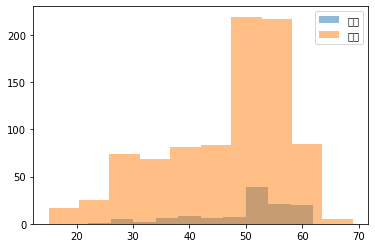

In [29]:
myhist(g_test,'age')

In [30]:
my_t(g_test,'age') # 유의

LeveneResult(statistic=9.232437395056856, pvalue=0.002440233296454718) [0.00408925]


/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

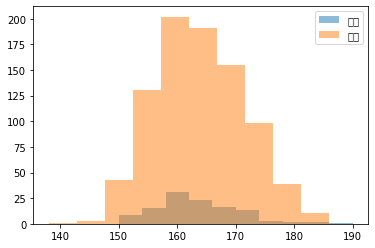

In [31]:
myhist(g_test,'height')

In [32]:
my_t(g_test,'height')

LeveneResult(statistic=0.8483535536144244, pvalue=0.3572435957677379) [0.37410711]


/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

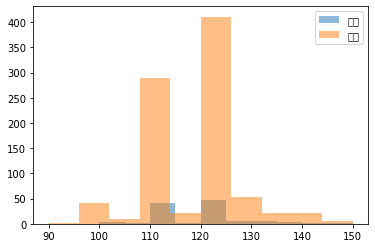

In [33]:
myhist(g_test,'bp_max')

In [34]:
my_t(g_test,'bp_max')

LeveneResult(statistic=0.006666556252196878, pvalue=0.9349424030869621) [0.99385629]


/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

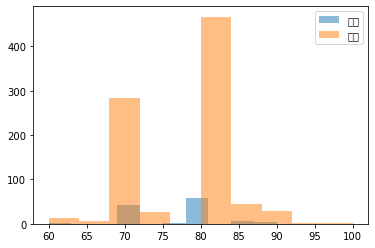

In [35]:
myhist(g_test,'bp_min')

In [36]:
my_t(g_test,'bp_min')

LeveneResult(statistic=0.14788752223069207, pvalue=0.7006451894862586) [0.39327192]


/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

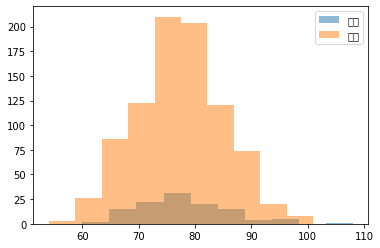

In [37]:
myhist(g_test,'waist')

In [38]:
my_t(g_test,'waist')

LeveneResult(statistic=0.023155729179023157, pvalue=0.8790839015934621) [0.33767176]


/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

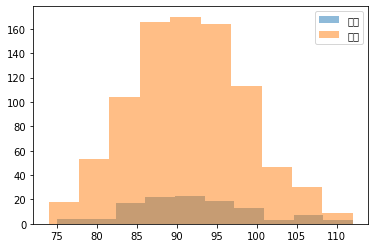

In [39]:
myhist(g_test,'bust')

In [40]:
my_t(g_test,'bust')

LeveneResult(statistic=1.403092442796517, pvalue=0.23649163513898333) [0.2690445]


/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

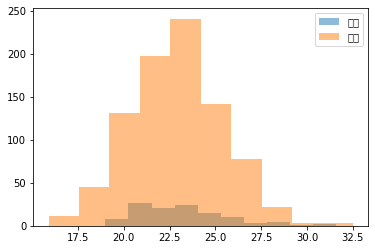

In [41]:
myhist(g_test,'bmi')

In [42]:
my_t(g_test,'bmi')

LeveneResult(statistic=0.060714113593481944, pvalue=0.8054220290755479) [0.21815035]


/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

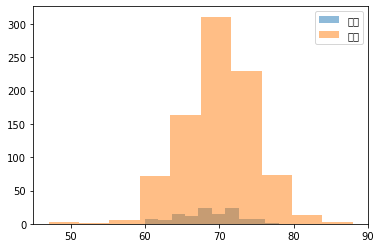

In [43]:
myhist(g_test,'pulse_count')

In [44]:
my_t(g_test,'pulse_count')

LeveneResult(statistic=0.8542105859247359, pvalue=0.35558980328665146) [0.28940101]


/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

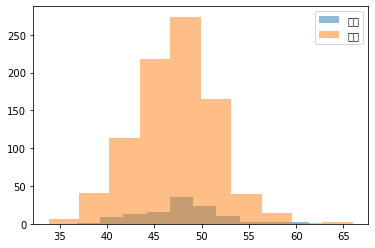

In [45]:
myhist(g_test,'whtr')

In [46]:
my_t(g_test,'whtr')

LeveneResult(statistic=0.012377343729400872, pvalue=0.9114379383757829) [0.1278448]


### 로지스틱 탐색

In [47]:
g_test.columns

Index(['Unnamed: 0.1', 'customer_id', 'review_cat', 'judge', 'review_date',
       'gender', 'age', 'height', 'weight', 'bust', 'waist', 'bp_min',
       'bp_max', 'pulse_count', 'bt_chol', 'bp_judge', 'pulse_count_judge',
       'judge_score', 'risk', 'bmi', 'whtr'],
      dtype='object')

In [48]:
log_model = Logit.from_formula(''' risk ~ C(gender) + age + height + bust
+bmi+whtr+bp_min+bp_max+pulse_count + C(pulse_count_judge) +C(judge_score)+weight+
C(bp_judge)''',data = g_test)

#waist 버림
log_result = log_model.fit()
print(log_result.summary())

# 판정은 0 아니면 1 따라서, 스케일은 진행하지 X

         Current function value: 0.337747
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   risk   No. Observations:                  989
Model:                          Logit   Df Residuals:                      970
Method:                           MLE   Df Model:                           18
Date:                Tue, 16 Mar 2021   Pseudo R-squ.:                 0.06037
Time:                        09:14:01   Log-Likelihood:                -334.03
converged:                      False   LL-Null:                       -355.49
Covariance Type:            nonrobust   LLR p-value:                 0.0008214
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    12.9720     20.254      0.640      0.522     -26.725      52.669
C(gender)[T.2]      

/home/piai/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [49]:
df_x = g_test.drop(['risk','customer_id','review_cat','judge','review_date'],axis = 1)
df_x # 종속 변수 빼고 새롭게 데이터 프레임 생성
df_x_const = add_constant(df_x) # const열 생성

df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values,i) for i in range(df_x_const.shape[1])]
df_vif.sort_values('VIF',inplace=True)
df_vif.round(3) # 다중공선성 존재 X -> 회귀식 자체로 판단

,variable,VIF
13,judge_score,1.020
12,pulse_count_judge,1.040
9,pulse_count,1.050
11,bp_judge,1.929
2,age,2.321
7,bp_min,3.382
5,bust,3.809
8,bp_max,4.754
0,Unnamed: 0.1,8.187
1,gender,8.799


In [50]:
df_x = g_test.drop(['risk','customer_id','review_cat','judge','review_date'
                   ,'waist','weight'],axis = 1)
df_x # 종속 변수 빼고 새롭게 데이터 프레임 생성
df_x_const = add_constant(df_x) # const열 생성

df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values,i) for i in range(df_x_const.shape[1])]
df_vif.sort_values('VIF',inplace=True)
df_vif.round(3) # 다중공선성 존재 X -> 회귀식 자체로 판단

,variable,VIF
11,judge_score,1.014
10,pulse_count_judge,1.032
7,pulse_count,1.050
9,bp_judge,1.924
2,age,2.304
12,bmi,2.995
5,bp_min,3.381
3,height,3.458
13,whtr,3.513
4,bust,3.800


In [51]:
log_model = Logit.from_formula(''' risk ~ C(gender) + age + height + bust
+bmi+whtr+bp_min+bp_max+pulse_count + C(pulse_count_judge) +C(judge_score)+
C(bp_judge)''',data = g_test)
log_result = log_model.fit()
print(log_result.summary())

# 판정은 0 아니면 1 따라서, 스케일은 진행하지 X

         Current function value: 0.337774
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   risk   No. Observations:                  989
Model:                          Logit   Df Residuals:                      971
Method:                           MLE   Df Model:                           17
Date:                Tue, 16 Mar 2021   Pseudo R-squ.:                 0.06029
Time:                        09:14:01   Log-Likelihood:                -334.06
converged:                      False   LL-Null:                       -355.49
Covariance Type:            nonrobust   LLR p-value:                 0.0005024
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    17.5752      4.911      3.579      0.000       7.950      27.200
C(gender)[T.2]      

/home/piai/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [52]:
df_y = g_test['risk']
model = LinearRegression()
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_x,df_y)
# df_x는 다중 공선성으로 제거 후 남은 x인자만 존재
selected_cols = df_x.columns[rfe.support_]
removed_cols = df_x.columns[~rfe.support_]

print("select variables : ",selected_cols)
print("removed variable : ",removed_cols)

select variables :  Index(['gender', 'height', 'bp_judge', 'pulse_count_judge', 'whtr'], dtype='object')
removed variable :  Index(['Unnamed: 0.1', 'age', 'bust', 'bp_min', 'bp_max', 'pulse_count',
       'bt_chol', 'judge_score', 'bmi'],
      dtype='object')


In [53]:
log_model = Logit.from_formula(''' risk ~ C(gender) + height
+whtr+C(pulse_count_judge)+
C(bp_judge)''',data = g_test)
log_result = log_model.fit()
print(log_result.summary())

# 판정은 0 아니면 1 따라서, 스케일은 진행하지 X

         Current function value: 0.349876
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   risk   No. Observations:                  989
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            5
Date:                Tue, 16 Mar 2021   Pseudo R-squ.:                 0.02662
Time:                        09:14:01   Log-Likelihood:                -346.03
converged:                      False   LL-Null:                       -355.49
Covariance Type:            nonrobust   LLR p-value:                  0.001983
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    13.5631      3.932      3.449      0.001       5.856      21.270
C(gender)[T.2]      

/home/piai/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [54]:
log_model = Logit.from_formula(''' risk ~ C(gender) + height
+whtr''',data = g_test)
log_result = log_model.fit()
print(log_result.summary())

# 판정은 0 아니면 1 따라서, 스케일은 진행하지 X

Optimization terminated successfully.
         Current function value: 0.350218
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   risk   No. Observations:                  989
Model:                          Logit   Df Residuals:                      985
Method:                           MLE   Df Model:                            3
Date:                Tue, 16 Mar 2021   Pseudo R-squ.:                 0.02567
Time:                        09:14:01   Log-Likelihood:                -346.37
converged:                       True   LL-Null:                       -355.49
Covariance Type:            nonrobust   LLR p-value:                 0.0003903
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         13.7044      3.930      3.487      0.000       6.002      21.406
C(gender)[T.2]   

In [55]:
log_model = Logit.from_formula(''' risk ~ C(gender) + age + height 
''',data = g_test)
log_result = log_model.fit()
print(log_result.summary())

# 로지스틱 2

Optimization terminated successfully.
         Current function value: 0.345727
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   risk   No. Observations:                  989
Model:                          Logit   Df Residuals:                      985
Method:                           MLE   Df Model:                            3
Date:                Tue, 16 Mar 2021   Pseudo R-squ.:                 0.03816
Time:                        09:14:01   Log-Likelihood:                -341.92
converged:                       True   LL-Null:                       -355.49
Covariance Type:            nonrobust   LLR p-value:                 5.518e-06
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         15.9665      3.973      4.019      0.000       8.180      23.753
C(gender)[T.2]   

# Case 정리

- 파라미터 설정 X (컨퓨전 분류 X)
- scale 모델 사용 X (컨퓨전 분류 X)

### 정확도 / 정밀도 / 재현도_GB모델

- 검정 : 'age', 'gender', 0.869, 컨퓨전 x
- 로지스틱 : 'gender','height','whtr', 0.828 / 0.866 / 0.95
- 후진제거법 : 'gender', 'height', 'whtr', 'bp_judge', 'pulse_count_judge' 0.825 / 0.866 / recall 0.946
- 로지스틱 2 : 'gender' , 'age' , 'height' 0.862 / 0.87 / 0.988

### 정확도 / 정밀도 / 재현도_RF모델

- 검정 : 'age', 'gender', 0.869, 컨퓨전 x
- 로지스틱 : 'gender','height','whtr', 0.828 / 0.866 / 0.95
- 후진제거법 : 'gender', 'height', 'whtr', 'bp_judge', 'pulse_count_judge' 0.828 / 0.865 / recall 0.946
- 로지스틱 2 : 'gender' , 'age' , 'height' 0.862 / 0.87 / 0.988
- 'gender','age','height','whtr','bmi' 0.862 / 0.871 / 0.992 -> 선택(정밀도 높은 모델)

In [56]:
ensem_x = g_test[['gender','age','height','whtr','bmi']]
ensem_y = g_test[['risk']]

# ensem_x = pd.get_dummies(ensem_x)

# scaler = StandardScaler()
# en_sc = scaler.fit_transform(ensem_x)
# ensem_x = pd.DataFrame(en_sc,columns=ensem_x.columns)

# 데이터 분할 1 : 학습용과 시험용

train_x, test_x, train_y, test_y = train_test_split(ensem_x,ensem_y,test_size=0.3,random_state = 1234)
# 학습용 데이터를 밸리데이션과 학습용으로 분할함으로써 CV진행 준비
train_x, val_x, train_y, val_y = train_test_split(train_x,train_y,test_size = 3/7, random_state = 1234)

In [57]:
gb_first = RandomForestClassifier(random_state=1234)
gb_first.fit(train_x,train_y)

print()
print('초기 모델의 train data의 설명력 : {:.3f}'.format(gb_first.score(train_x,train_y)))
print('초기 모델의 validation data의 설명력 : {:.3f}'.format(gb_first.score(val_x,val_y)))
print('초기 모델의 test data의 설명력 : {:.3f}'.format(gb_first.score(test_x,test_y)))

<ipython-input-57-54b5de49640e>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  gb_first.fit(train_x,train_y)



초기 모델의 train data의 설명력 : 1.000
초기 모델의 validation data의 설명력 : 0.872
초기 모델의 test data의 설명력 : 0.869


In [58]:
y_pred=gb_first.predict(test_x)
print('Accuracy:{0:.3f}\n'.format(gb_first.score(test_x,test_y)))
print('Confusion matrix:\n{}'.format(confusion_matrix(test_y,y_pred)))

#분석 모델
model=['GradientBoosting']
#정확도 저장
train_accuracy=[]; test_accuracy=[]
#f1 score 저장
model_f1_score=[]
#auc score 저장
model_auc=[]
#precision score저장
model_precision_score=[]
#recall score 저장
model_recall_score=[]

#최종 모델
gb_model=RandomForestClassifier(random_state=1234)
gb_model.fit(train_x,train_y)
# train 정확도
train_accuracy.append(gb_model.score(train_x, train_y))
# test 정확도
test_accuracy.append(gb_model.score(test_x, test_y))
#최종 모델을 이용한 분류 예측
y_pred=gb_model.predict(test_x)
#roc_curve(실제값,예측값) fpr=(FP)/(FP+TN):거짓 양성 비율, tpr=TP/(TP+FN):진짜 양성비율(재현율)
fpr,tpr,thresholds=roc_curve(test_y,y_pred)
roc_auc=auc(fpr,tpr)
#auc 저장
model_auc.append(roc_auc)

#f1스코어
model_f1_score.append(f1_score(test_y,y_pred))
#precision 스코어
model_precision_score.append(precision_score(test_y,y_pred))
#recall 스코어
model_recall_score.append(recall_score(test_y,y_pred))

df_eval=pd.DataFrame(index=model)
df_eval['TrainAccuracy']=train_accuracy
df_eval['TestAccuracy']=test_accuracy
df_eval['F1Score']=model_f1_score
df_eval['AUC']=model_auc
df_eval['PrecisionScore']=model_precision_score
df_eval['RecallScore']=model_recall_score
df_eval.round(3)

Accuracy:0.869

Confusion matrix:
[[  0  35]
 [  4 258]]


<ipython-input-58-3a8537d72896>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  gb_model.fit(train_x,train_y)


,TrainAccuracy,TestAccuracy,F1Score,AUC,PrecisionScore,RecallScore
GradientBoosting,1.0,0.869,0.93,0.492,0.881,0.985


정밀도 고려 : 최종 변수 선택 'gender','age','height','whtr','bmi'

## 거절 고객 분류

In [59]:
df_raw = pd.read_csv('pre_review_preprocessing.csv',encoding='euckr')
#insu_pre_review
df_test = df_raw[df_raw['judge']=='거절']
df_test = df_test[df_test['review_cat'] != '혈액검사']
df_reject = df_test[['gender','age','height','whtr','bmi']]

# df_reject = pd.get_dummies(df_reject)
# en_sc_2 = scaler.fit_transform(df_reject)
# df_reject = pd.DataFrame(en_sc_2,columns=df_reject.columns)

In [60]:
pred = gb_first.predict(df_reject)
df_reject['risk'] = pred
df_reject['customer_id'] = df_test['customer_id']

<ipython-input-60-8feb989cba7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reject['risk'] = pred
<ipython-input-60-8feb989cba7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reject['customer_id'] = df_test['customer_id']


In [61]:
df_reject.groupby('risk').count()

,gender,age,height,whtr,bmi,customer_id
risk,,,,,,
0.0,13,13,13,13,13,13
1.0,470,470,470,470,470,470


### 총 수익 고객 4명, 위험 고객 479명 -> 일반 검사 기준
### 위험 고객은 2분류 이동, 저위험 고위험으로 분류

- 최대한 정확도, 정밀도가 높은 변수 선정 -> 일반검사는 정보가 부족, 엄격하게!

In [62]:
# 데이터 내보내기

df_profit = df_reject[df_reject['risk'] == 0][['customer_id','risk']]
df_danger = df_reject[df_reject['risk'] == 1][['customer_id','risk']]

df_profit.to_csv('profit_reject_g.csv',encoding='euckr')
df_danger.to_csv('danger_reject_g.csv',encoding='euckr')